<a href="https://colab.research.google.com/github/palabebek/Machine-Learning/blob/main/Week%205/netflix_titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# 1. Feature Engineering & EDA

# Cek Nilai hilang
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Isi nilai yang hilang untuk 'negara', 'sutradara', dan 'pemeran' dengan 'Tidak Diketahui'
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Isi nilai yang hilang di 'date_added' dengan tanggal yang paling sering
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

# Isi 'peringkat' yang hilang dengan mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Membagi 'durasi' menjadi dua fitur: duration_int dan duration_type
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

# Ubah 'date_added' menjadi datetime
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True, errors='coerce')


# Ekstrak tahun dan bulan dari 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


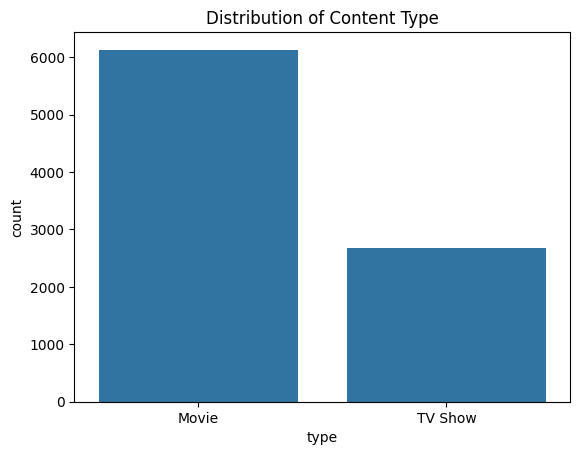

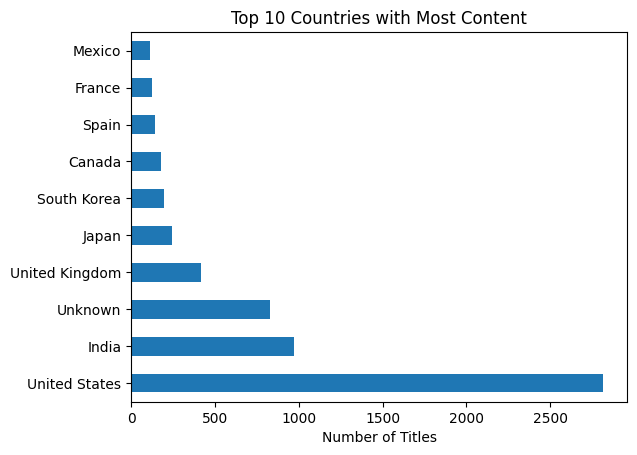

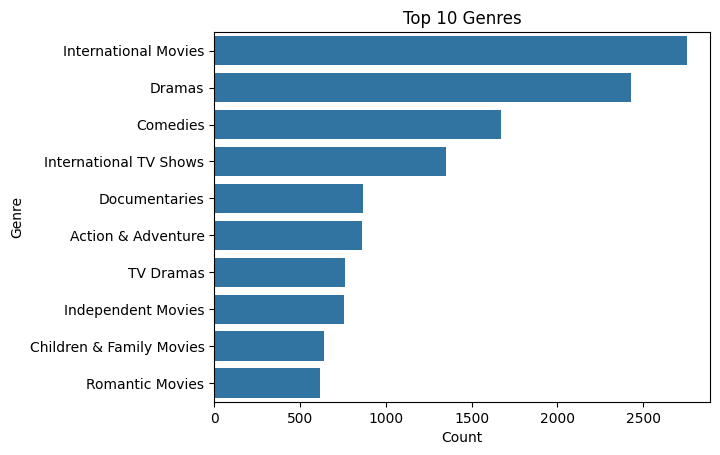

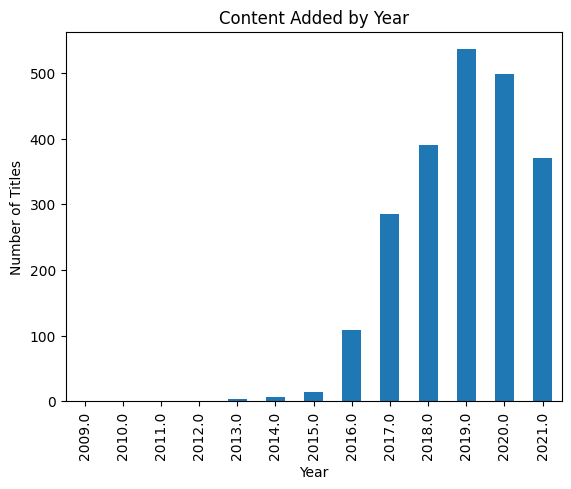

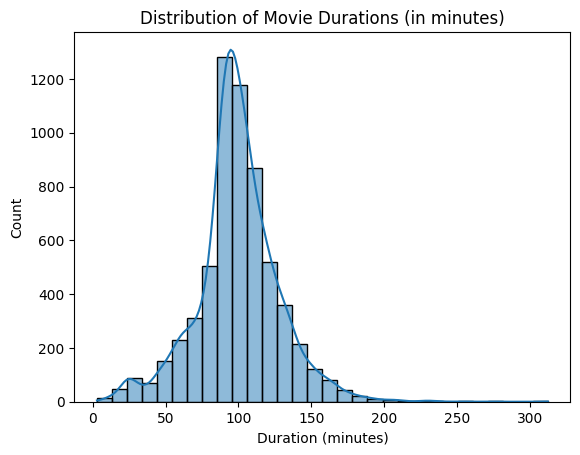

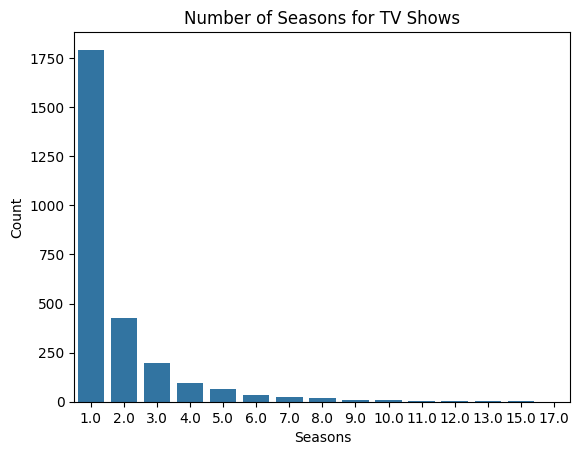

In [ ]:
# 2. Data Visualization

# Distribusi jenis konten
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type')
plt.show()

# 10 negara teratas dengan konten terbanyak
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.show()

# 10 genre teratas (dipisah dari 'listed_in')
from collections import Counter
genres = df['listed_in'].str.split(', ')
genre_list = [genre for sublist in genres for genre in sublist]
top_genres = Counter(genre_list).most_common(10)

# Konversi ke DataFrame untuk membuat plot
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
sns.barplot(data=genre_df, y='Genre', x='Count')
plt.title('Top 10 Genres')
plt.show()

# Konten ditambahkan berdasarkan tahun
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Distribusi durasi (Hanya film)
movies = df[df['type'] == 'Movie']
sns.histplot(movies['duration_int'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.show()

# Jumlah Musim Acara TV
tv_shows = df[df['type'] == 'TV Show']
sns.countplot(data=tv_shows, x='duration_int')
plt.title('Number of Seasons for TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

In [ ]:
# 3. Persamaan Matematika (Contoh)
# menghitung proporsi Movies:
num_movies = len(df[df['type'] == 'Movie'])
total = len(df)
proporsi_movie = num_movies / total
print(f"Proporsi konten bertipe Movie: {proporsi_movie:.2f} atau {proporsi_movie*100:.2f}%")


Proporsi konten bertipe Movie: 0.70 atau 69.62%
